# Matrix Multiplication Benchmark Analysis
This notebook loads and analyzes the dense and sparse benchmark CSVs.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

dense = pd.read_csv('dense_results.csv', encoding='latin-1')
sparse = pd.read_csv('sparse_results.csv', encoding='latin-1')
dense.head(), sparse.head()

(   size            method  avg_time  std_time  min_time  max_time  \
 0    10       Basic O(n³)  0.000222  0.000039  0.000171  0.000267   
 1    10      NumPy (BLAS)  0.000006  0.000006  0.000002  0.000015   
 2    10          Strassen  0.000010  0.000003  0.000005  0.000013   
 3    10   Cache Optimized  0.000022  0.000013  0.000012  0.000040   
 4    10  Transpose Method  0.000364  0.000008  0.000356  0.000375   
 
    avg_memory_mb  max_memory_mb  
 0            0.0            0.0  
 1            0.0            0.0  
 2            0.0            0.0  
 3            0.0            0.0  
 4            0.0            0.0  ,
    size  sparsity  actual_sparsity         method  avg_time  std_time  \
 0   100      50.0            49.36     CSR Format  0.001151  0.000650   
 1   100      50.0            49.36     CSC Format  0.001173  0.000746   
 2   100      50.0            49.36  Dense (NumPy)  0.000167  0.000015   
 3   100      70.0            69.28     CSR Format  0.000383  0.000012 

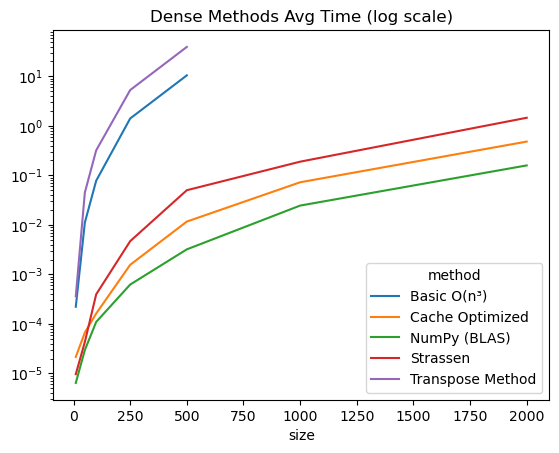

In [3]:
pivot = dense.pivot(index='size', columns='method', values='avg_time')
pivot.plot(logy=True)
plt.title('Dense Methods Avg Time (log scale)')
plt.show()

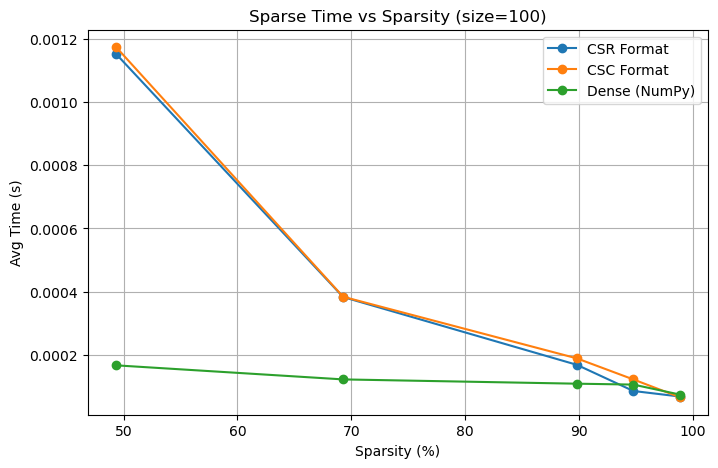

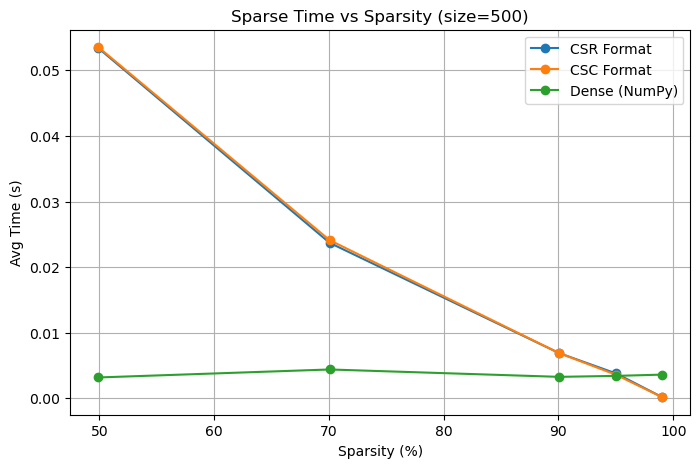

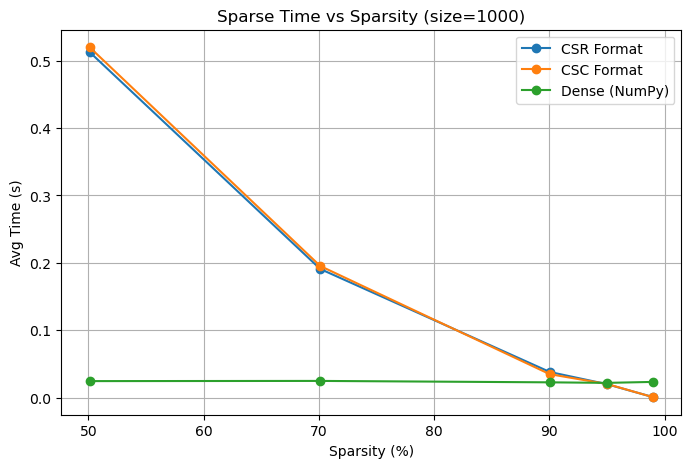

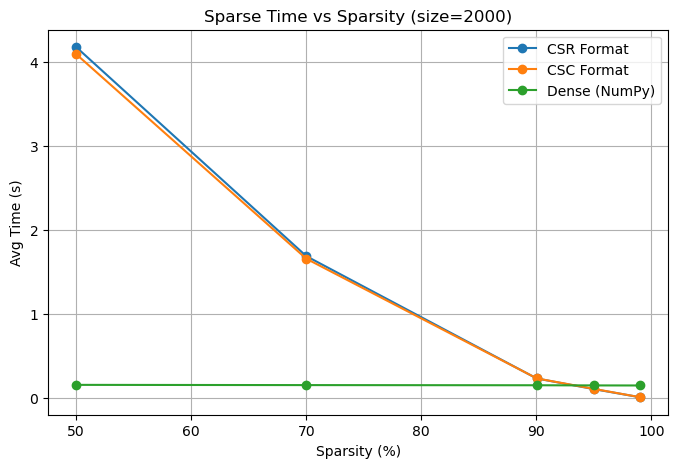

In [5]:
for size in sorted(sparse['size'].unique()):
    subset = sparse[sparse['size'] == size]
    plt.figure(figsize=(8,5))
    for method in subset['method'].unique():
        sub2 = subset[subset['method'] == method]
        plt.plot(sub2['actual_sparsity'], sub2['avg_time'], marker='o', label=method)
    
    plt.title(f"Sparse Time vs Sparsity (size={size})")
    plt.xlabel("Sparsity (%)")
    plt.ylabel("Avg Time (s)")
    plt.legend()
    plt.grid(True)
    plt.show()